This model will be a bit different from Kaggle as I will drop the two extreme outliers to reduce the variance.  I cannot do this in kaggle as I need the same number of rows for the train and test data.

# Import and Data

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [54]:
# using the example from the baseline data
data = './../datasets/'
train = 'train_features.csv'


In [55]:
#only need the training data as the testing is for Kaggle and does not have the sale price values to look at
train_df_feat = pd.read_csv(data+train)


In [56]:
train_df_feat.head()

,Id,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,Year Remod/Add,bath_abv,bath_bsmt,Neighborhood,roomratio,rm_area_intr,Bsmt Qual,SalePrice
0,109,6,1479,475.0,725.0,2005,3,0.0,Sawyer,0.500000,8874,TA,130500
1,544,7,2122,559.0,913.0,1997,3,1.0,SawyerW,0.375000,16976,Gd,220000
2,153,5,1057,246.0,1057.0,2007,1,1.0,NAmes,0.200000,5285,TA,109000
3,318,5,1444,400.0,384.0,2007,3,0.0,Timber,0.428571,10108,Gd,174000
4,255,6,1445,484.0,676.0,1993,2,0.0,SawyerW,0.333333,8670,Fa,138500


In [57]:
train_df_feat.drop(index=[960, 1885],inplace=True)

# Dummy Variables

In [58]:


train_df_feat = pd.get_dummies(train_df_feat, columns=[ 'Overall Qual', 'bath_abv', 'bath_bsmt',
                                        'Neighborhood', 'Bsmt Qual'], drop_first=True)



In [59]:
train_df_feat.head()

,Id,Gr Liv Area,Garage Area,Total Bsmt SF,Year Remod/Add,roomratio,rm_area_intr,SalePrice,Overall Qual_2,Overall Qual_3,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA
0,109,1479,475.0,725.0,2005,0.500000,8874,130500,0,0,...,1,0,0,0,0,0,0,0,0,1
1,544,2122,559.0,913.0,1997,0.375000,16976,220000,0,0,...,0,1,0,0,0,0,0,1,0,0
2,153,1057,246.0,1057.0,2007,0.200000,5285,109000,0,0,...,0,0,0,0,0,0,0,0,0,1
3,318,1444,400.0,384.0,2007,0.428571,10108,174000,0,0,...,0,0,0,0,1,0,0,1,0,0
4,255,1445,484.0,676.0,1993,0.333333,8670,138500,0,0,...,0,1,0,0,0,0,1,0,0,0


# Linear Model

In [61]:
#create the X and y
X = train_df_feat.drop(columns=['SalePrice','Id'])
y = train_df_feat['SalePrice']

In [62]:
lr = LinearRegression()

In [63]:
#lesson 3.04
# creating split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [64]:
#lesson 3.06
# log of the sale price to deal with outliers and try to make a normal dist
y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)

In [65]:
# getting r2 as a metric to look at model
cross_val_score(lr, X_train, y_train_log).mean()

0.8738859749568219

In [66]:
lr.fit(X_train, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
train_pred = lr.predict(X_train)

In [68]:
train_pred = np.exp(train_pred)

In [69]:
#lesson 3.02
# checking RMSE as that is important to kaggle
mean_squared_error(y_train, train_pred)**(1/2)

23903.050185946675

In [70]:
# checking r2 for train and test
lr.score(X_train, y_train_log)

0.8880741287494756

In [71]:
lr.score(X_test, y_test_log)

0.8772803595723355

In [72]:
test_pred = np.exp(lr.predict(X_test))

In [73]:
mean_squared_error(y_test, test_pred)**(1/2)

23278.521334097477

Less variance then the kaggle model without the two outliers

In [74]:
resids = y_test - test_pred

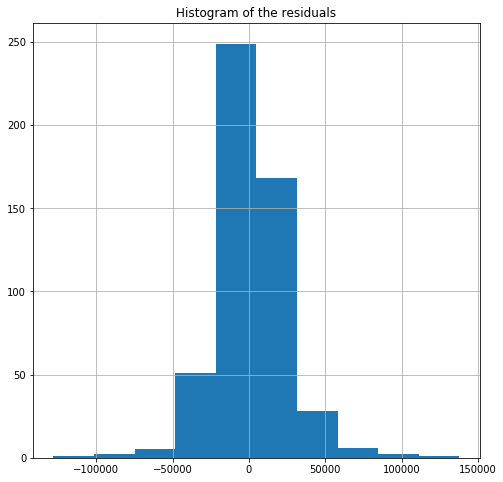

In [83]:
plt.figure(figsize=(8,8))
resids.hist()

plt.title('Histogram of the residuals')
plt.savefig('./../images/residuals.png');

In [88]:
#r2 score after reverting the log transform
r2_score(y_test, test_pred)

0.9088232330717814